In [1]:
# import the packages/libraries that we will need
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import scipy as sp
from scipy.linalg import solve_triangular
np.set_printoptions(precision=2, suppress=True)




C:\Users\Andi\AppData\Local\Temp\ipykernel_49416\3929591706.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
#Function Tools
def generateRandomMatrix(n = 100, d = 10):
    return np.random.randn(n,d)

def generateRandomMatrix10(n = 100, d = 10):
    return np.random.rand(n, d) * 10

def generateRandomW(d=10):
    return np.random.randn(d)

def generateYvalue(X, w):
    return X.dot(w)

def solveQR(X):
    return sp.linalg.qr(X, mode="economic")

def compareExactly(a, b):
    return (a == b).all()

def compareMatrix(a, b):
    return np.allclose(a,b)

def generateYvaluesNoise(X, w):
    y = generateYvalue(X,w)
    #print(y)
    return np.random.normal(1*y)

def getFirstColumns(matrix, d=2):
    return matrix[:, :d]

def createConcatenateMatrix(X, X_added):
    return np.concatenate((X, X_added), axis=1)




# Linear independant Attributes


In [3]:
#Linear independant Attributes
#Matrice wide random
X = generateRandomMatrix()

#w based on columns of X (En parmamètre : le nombre de colonnes de la matrice X avec "shape")
w = generateRandomW(X.shape[1])

#target values y
y = generateYvalue(X, w)

#Solving using QR
Q,R = solveQR(X)

solution = solve_triangular(R,Q.T.dot(y))

result = compareMatrix(solution, w)


if(result == True):
    print("La solution trouvée avec QR correspond au w généré aléatoirement avant le calcul de l'algorithme")
else:
    print("Les deux vecteurs ne sont pas identiques")
print("Solution trouvée par QR : " , solution)
print("w généré aléatoirement : " , w)


La solution trouvée avec QR correspond au w généré aléatoirement avant le calcul de l'algorithme
Solution trouvée par QR :  [ 1.8  -1.26 -0.19 -1.39 -0.99 -0.06  0.18  0.61  0.41  0.88]
w généré aléatoirement :  [ 1.8  -1.26 -0.19 -1.39 -0.99 -0.06  0.18  0.61  0.41  0.88]


Calcul de la matrice pseudo inverse via QR factorisation  afin de résoudre Xw = y

$A† = (A^T A)^{-1}A^T= (R^T R)^{−1}(QR)^T= R^{−1}R^{−T} R^T Q^T= R^{−1} Q^T$ : A étant la matrice X

$ w = A^† y$

In [4]:
#Comme nous avons trouvé Q et R plus tôt, il est possible de détérminer la matrice pseudo inverse facilement
#Les valeurs seront les mêmes pour ainsi comparer le résultat

R_1 = np.linalg.inv(R)
Q_T = np.transpose(Q)

X_pseudo_inverse = np.dot(R_1, Q_T)
w_pseudo_inverse = np.dot(X_pseudo_inverse, y)

result = compareMatrix(w_pseudo_inverse, w)

if(result == True):
    print("La solution trouvée avec la matrice pseudo-inverse via QR Factorisation correspond au w généré aléatoirement avant le calcul de l'algorithme")
else:
    print("Les deux vecteurs ne sont pas identiques")
print("Solution trouvée par QR : " , solution)
print("w généré aléatoirement : " , w)

La solution trouvée avec la matrice pseudo-inverse via QR Factorisation correspond au w généré aléatoirement avant le calcul de l'algorithme
Solution trouvée par QR :  [ 1.8  -1.26 -0.19 -1.39 -0.99 -0.06  0.18  0.61  0.41  0.88]
w généré aléatoirement :  [ 1.8  -1.26 -0.19 -1.39 -0.99 -0.06  0.18  0.61  0.41  0.88]


Répétition de la procédure avec l'ajout d'un "bruit" aléatoire sur le vecteur y

In [5]:
#######
#Same exercice, with Noise
#target values y with Noise
y_noise = generateYvaluesNoise(X, w)
solutionNoise = solve_triangular(R,Q.T.dot(y_noise))
result = compareMatrix(solutionNoise, w)

if(result == True):
    print("La solution trouvée avec QR correspond au w généré aléatoirement avant le calcul de l'algorithme")
else:
    print("Les deux vecteurs ne sont pas identiques")
print("Solution trouvée par QR : " , solutionNoise)
print("w généré aléatoirement : " , w)

Les deux vecteurs ne sont pas identiques
Solution trouvée par QR :  [ 1.79 -1.23 -0.4  -1.36 -0.88 -0.24 -0.01  0.6   0.19  0.87]
w généré aléatoirement :  [ 1.8  -1.26 -0.19 -1.39 -0.99 -0.06  0.18  0.61  0.41  0.88]


# Linear dependencies in the attributes

In [6]:
#Linear dependencies in the attributes
#Creation de la matrice X' appelée X_prime
#Cette matrice est une combinaison de la matrice X + les deux premières colonnes de la matrice X
X_prime = createConcatenateMatrix(X, getFirstColumns(X))
w = generateRandomW(X_prime.shape[1])
y = generateYvalue(X_prime, w)
Q,R = solveQR(X_prime)
solution_prime = solve_triangular(R,Q.T.dot(y))
result = compareMatrix(solution_prime, w)
if(result == True):
    print("La solution trouvée avec QR correspond au w généré aléatoirement avant le calcul de l'algorithme")
else:
    print("Les deux vecteurs ne sont pas identiques")
print("Solution trouvée par QR pour la matrice X': " , solution_prime)
print("w généré aléatoirement selon X'w = y:       " , w)




Les deux vecteurs ne sont pas identiques
Solution trouvée par QR pour la matrice X':  [-0.32  0.87 -0.01  0.03 -1.07  0.05  0.67 -0.   -0.17 -0.37  1.31 -0.35]
w généré aléatoirement selon X'w = y:        [ 0.39 -1.21 -0.01  0.03 -1.07  0.05  0.67 -0.   -0.17 -0.37  0.59  1.73]


# Visualising the ||Xw −y|| 2 

We will generate data as in the first paragraph but on a two dimensional
space so that we can visualise it.

Solution générée aléatoirement :  [0.22 1.13]
Solution générée à l'aide de la fonction lstsq() :  [0.22 1.15]


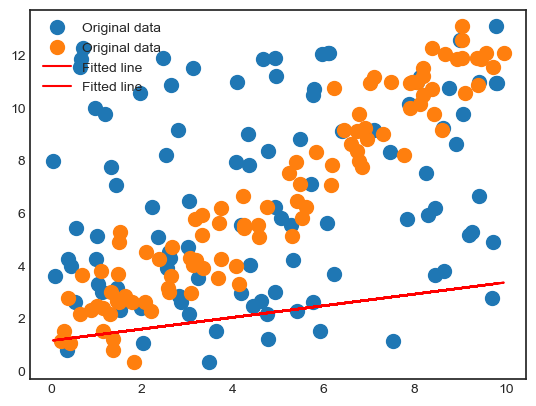

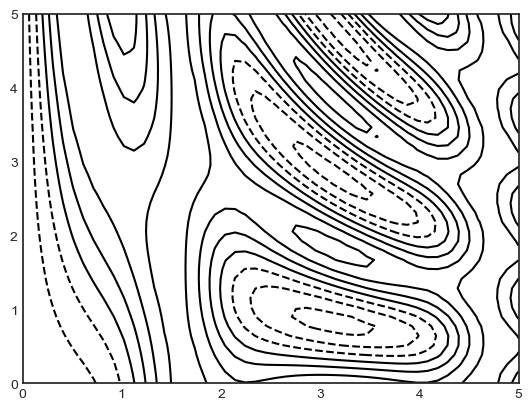

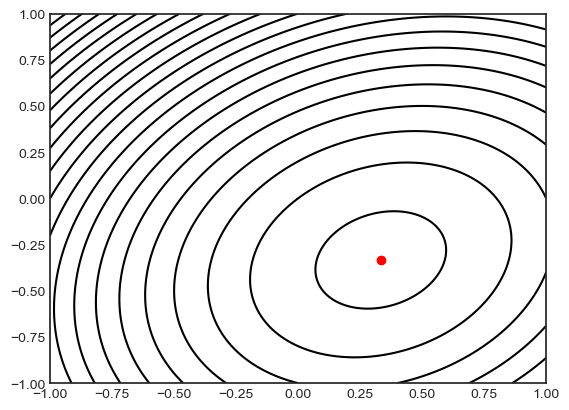

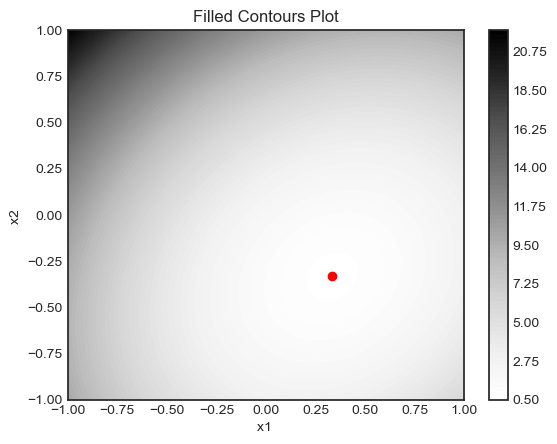

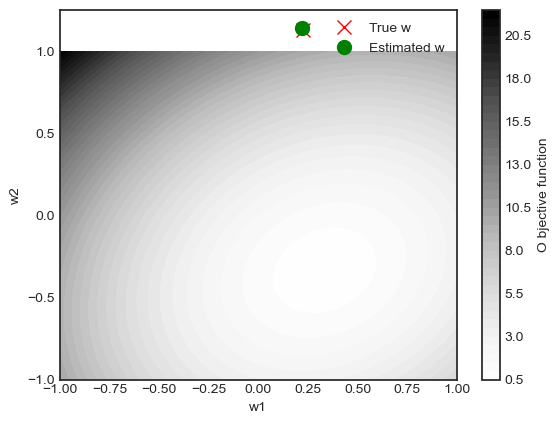

In [7]:
np.set_printoptions(precision=2, suppress=True)

#some random function. Note that x and y are same dimension 
#matrices whose dimensions are a result of the meshgrid function
#the computation that f is doing will be broadcasted over the 
#elements of x and y
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

##############################################################
#simply compute  ||Ax - b||^2, 
#by default implements the figure 12.1 of the Introduction to 
#linear algebra of Boyd where:
#A : 3 x 2 array/matrix
#b : 3 x 1 array/matrix
#x : 2 x 1 point on which we evaluate the ||Ax - b||^2
#
#Note: x_1 and x_2 are matrices that define a grid in the 2D space
#      LeastSquareFunction must return a result with the same structure
#      as x_1 or x_2 evaluated at every x = (x_1[i,j], x_2[i,j]) point
"""
    for i in range(x_1.shape[0]):
        for j in range(x_1.shape[1]):
            w_temp = np.array([x_1[i,j],x_2[i,j]])
            diff = A.dot(w_temp) - b  # Xw - y
            norm_squared = np.linalg.norm(diff)**2  # ||Xw - y||^2
            result[i][j] = norm_squared
"""
### Version sans la double boucle for
def LeastSquareFunction(x_1, x_2, 
                        A=np.array([ [ 2, 0], 
                                     [-1, 1], 
                                     [ 0, 2]]), 
                        b=np.array([[1],[0],[-1]])):
    
    x_stack = np.stack((x_1, x_2), axis=-1)
    obj_vals = np.sum((A.dot(x_stack.reshape((-1, 2)).T) - b.reshape((-1, 1))) ** 2, axis=0)
    #print(obj_vals.shape)
    obj_mesh = obj_vals.reshape(x_1.shape)
    #print(obj_mesh)
    return obj_mesh



#Generation d'une matrice X de taille (100,2) :
X_3 = generateRandomMatrix10(100,2)

#Generation du w :
w_3 = generateRandomW(X_3.shape[1])
print("Solution générée aléatoirement : ", w_3)
#Generation du y avec le bruit :
y_3 = generateYvaluesNoise(X_3, w_3)

#Generation de la solution avec "least square" :
#m, c = LeastSquareFunction(X_3, y_3)

m, c = np.linalg.lstsq(X_3, y_3, rcond=None)[0]
resultLstsq = np.array([m,c])
print("Solution générée à l'aide de la fonction lstsq() : ", resultLstsq)

#Plot :
plot1 = plt.plot(X_3, y_3, 'o', label='Original data', markersize=10)
plot1 = plt.plot(X_3, m*X_3 + c, 'r', label='Fitted line')
plot1 = plt.legend()
plt.show()

#Plot selon le cours :
#lets check the level sets of the trigonometrix f function
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black')
plt.show()

#Lets draw now the f(x)=||Ax-b||^2 countours
#Generate the two dimensional grid over
#which we will evaluate the f(x)
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)

#X, Y are the coordinates of 
X, Y = np.meshgrid(x, y)
Z = LeastSquareFunction(X, Y)
#third argument is which levels sets to draw
plt.contour(X, Y, Z, np.arange(0,100,1), colors='black')
#1/3, -1/3 is the optimal solution for the 
#default A and b values in the LeastSquareFunction
plt.scatter(1/3,-1/3,color='red')
plt.show()

#smooth version of the above, but not
#easy to spot the conturs. 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x1 ')
ax.set_ylabel('x2 ')
plt.scatter(1/3,-1/3,color='red')
plt.show()


# Plot contour plot
fig, ax = plt.subplots()
ax.set_xlabel("w1")
ax.set_ylabel("w2")
contours = ax.contourf(X, Y, Z, levels=50)
cbar = plt.colorbar(contours)
cbar.ax.set_ylabel("O bjective function")
ax.plot(w_3[0], w_3[1], "rx", markersize=10, label="True w")
ax.plot(m, c, "go", markersize=10, label="Estimated w")
ax.legend()
plt.show()

